# Esercizi 11 - Neural network regression

## 11.1 - Modello lineare

Considero la funzione $$f(x)=2x+1$$

In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

### $\sigma=0$

Comincio a considerare dei dati senza rumore. Ho considerato $1000$ dati di validazione e $100$ dati di training.

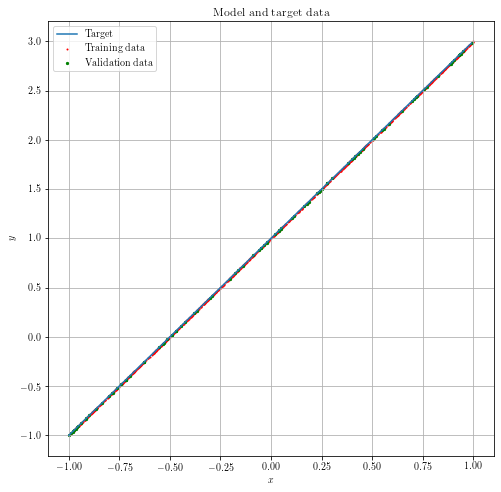

In [5]:
import numpy as np
import matplotlib.pyplot as plt


ntrain=1000
nvalid=100

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8,8))
plt.plot(x_valid, y_target, label="Target")
plt.title("Model and target data")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.scatter(x_train, y_train, color='r', s=1, label="Training data")
plt.scatter(x_valid, y_valid, color='g',s=5, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

Nel grafico sopra sono riportati in rosso i dati di training e in verde i dati di validazione. In blu è invece riportato il target, ovvero la funzione $f(x)=2x+1$. In questo caso, dato che il rumore è nullo, tutto i dati sono sovrapposti.

Costruisco il modello. In questo caso basta un solo neurone: ottimizzando il peso dell'unico input ($w$) e il bias ($b$) si può già ottenere un modello lineare (l'output dipenderebbe infattai solo da $wx+b$, ovvero proprio la retta che vogliamo stimare).

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Effettuo il training del modello. Utilizzando una batch size pari a $32$ stiamo di fatto considerando il "mini-batch SGD": per calcolare il gradiente della funzione costo (e quindi la direzione in cui muovere la nostra ricerca) utilizziamo soltanto una parte di tutti i dati disponibili, diversamente dal BGD, in cui vengono utilizzati tutti i dati, e dallo SGD, in cui si considera un dato per step. In questo modo la ricerca sarà "più indirizzata" verso i minimi locali rispetto allo SGD (al costo di una maggiore difficoltà nell'uscire da minimi locali) e rimarrà comunque efficiente dal punto di vista numerico (utilizzare tutti i dati per un singolo step come nel BGD potrebbe diventare presto molto dispendioso).

In [4]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.9035 - mse: 1.9035 - val_loss: 1.4291 - val_mse: 1.4291
Epoch 2/50
1000/1000 [==============================] - 0s 110us/sample - loss: 1.0285 - mse: 1.0285 - val_loss: 0.8376 - val_mse: 0.8376
Epoch 3/50
1000/1000 [==============================] - 0s 168us/sample - loss: 0.6074 - mse: 0.6074 - val_loss: 0.5190 - val_mse: 0.5190
Epoch 4/50
1000/1000 [==============================] - 0s 222us/sample - loss: 0.3763 - mse: 0.3763 - val_loss: 0.3315 - val_mse: 0.3315
Epoch 5/50
1000/1000 [==============================] - 0s 192us/sample - loss: 0.2397 - mse: 0.2397 - val_loss: 0.2139 - val_mse: 0.2139
Epoch 6/50
1000/1000 [==============================] - 0s 203us/sample - loss: 0.1543 - mse: 0.1543 - val_loss: 0.1386 - val_mse: 0.1386
Epoch 7/50
1000/1000 [==============================] - 0s 207us/sample - loss: 0.0998 - mse: 0.0998 - val_loss: 0.0898 - val_m

I pesi ottimizzati del network neurale sono quindi:

In [5]:
# return weights
model.get_weights()


[array([[1.999958]], dtype=float32), array([0.9999996], dtype=float32)]

Come si può vedere, i coefficienti che caratterizzano il neurone sono proprio quelli della retta target.

In questo caso, dato che non abbiamo considerato rumore, non ci sarà differenza tra il modello esatto e i dati di validazione nella valutazione delle performance del modello.

In [6]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print()
print('Test loss (validation data):', score[0])
print('Test accuracy (vadlidation data):', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# print performance
print('Test loss (exact curve):', score[0])
print('Test accuracy (exact curve):', score[1])


Test loss (validation data): 6.811634256642663e-10
Test accuracy (vadlidation data): 6.811634e-10
Test loss (exact curve): 6.811634256642663e-10
Test accuracy (exact curve): 6.811634e-10


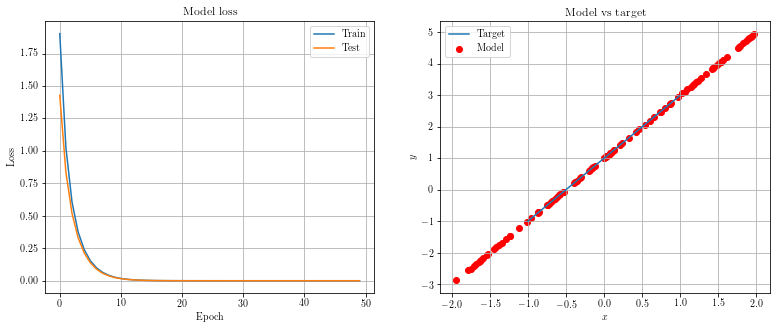

In [7]:
# look into training history
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

Come si può osservare dal grafico a sinistra, il modello riesce a fittare perfettamente i dati (visto che sono senza rumore) e dopo circa 20 epoche il MSE è ridotto a zero sia per i dati di training che per i dati di validazione. A destra è invece riportato il confronto tra la retta di target e 100 dati le cui ascisse sono estratte casualmente tra -2 e 2 e le cui ordinate sono invece predette dal modello. Come si può notare è riuscito ad approssimare la retta di target con notevole accuratezza e non soltanto nell'intervallo di training (-1,1).

Cosa succede utilizzando meno (o più) dati?

In [8]:
ntrain=500
nvalid=50

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 500 samples, validate on 50 samples
Epoch 1/100
500/500 [==============================] - 1s 2ms/sample - loss: 0.9105 - mse: 0.9105 - val_loss: 0.6121 - val_mse: 0.6121
Epoch 2/100
500/500 [==============================] - 0s 273us/sample - loss: 0.5240 - mse: 0.5240 - val_loss: 0.3527 - val_mse: 0.3527
Epoch 3/100
500/500 [==============================] - 0s 241us/sample - loss: 0.3111 - mse: 0.3111 - val_loss: 0.2126 - val_mse: 0.2126
Epoch 4/100
500/500 [==============================] - 0s 221us/sample - loss: 0.1933 - mse: 0.1933 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 5/100
500/500 [==============================] - 0s 253us/sample - loss: 0.1257 - mse: 0.1257 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 6/100
500/500 [==============================] - 0s 280us/sample - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 7/100
500/500 [==============================] - 0s 290us/sample - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0445 - val_mse: 0.044

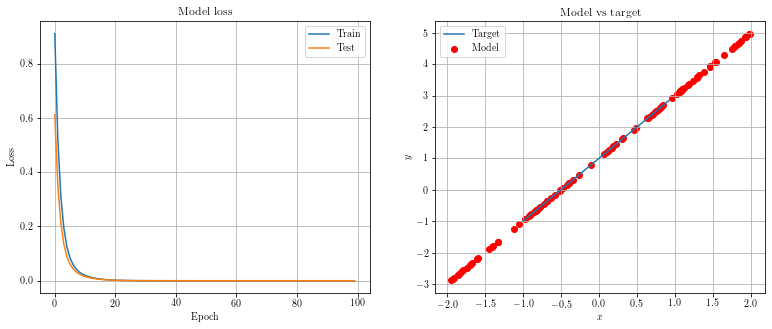

In [9]:

# look into training history
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

Come si può vedere, utilizzando $500$ dati di training e $50$ di validazione, a $20$ epoche il modello ancora non era riuscito a minimizzare il MSE.

In [10]:
ntrain=2000
nvalid=200

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=25,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/25
2000/2000 [==============================] - 1s 372us/sample - loss: 0.9574 - mse: 0.9574 - val_loss: 0.4065 - val_mse: 0.4065
Epoch 2/25
2000/2000 [==============================] - 0s 86us/sample - loss: 0.2682 - mse: 0.2682 - val_loss: 0.1424 - val_mse: 0.1424
Epoch 3/25
2000/2000 [==============================] - 0s 92us/sample - loss: 0.1012 - mse: 0.1012 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 4/25
2000/2000 [==============================] - 0s 92us/sample - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 5/25
2000/2000 [==============================] - 0s 86us/sample - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 6/25
2000/2000 [==============================] - 0s 84us/sample - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/25
2000/2000 [==============================] - 0s 90us/sample - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0017 - val_mse: 

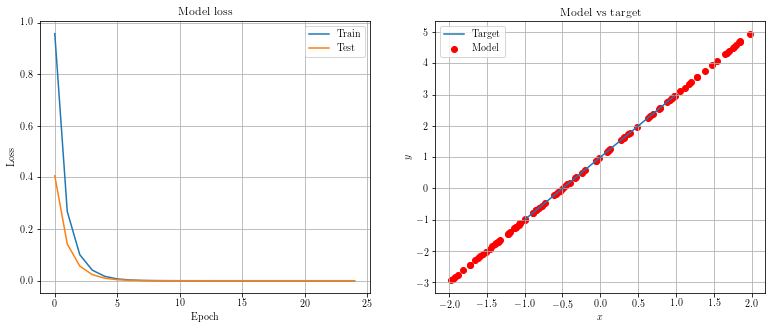

In [11]:

# look into training history
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

Invece, utilizzando $2000$ dati di training e $200$ di validazione, dopo circa $10$ epoche il sistema aveva già ridotto al massimo il MSE.

Questo confronto sul numero di dati è ovviamente molto qualitativo. In questi esempi stiamo considerando $\sigma=0$, quindi tutti i dati sono "esatti" e, a prescindere dal numero di dati utilizzati, si potrà sempre arrivare alla soluzione "target". Diversa è ovviamente la situazione quando i dati non sono così puliti: in questo caso, ovviamente, avere più dati consente di arrivare a un risultato migliore.

### $\sigma \neq 0$

Provo ora a inserire del rumore nei dati di training e di validazione, nello specifico ho considerato un rumore gaussiano con $\sigma=0.5$. Ho inizialmente utilizzato $1000$ dati di training e $100$ di validazione.

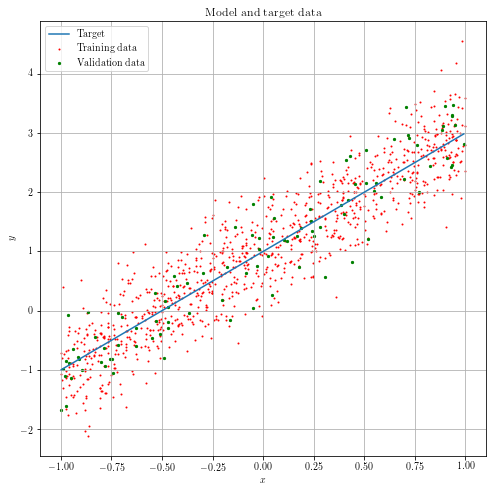

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 1s 865us/sample - loss: 0.9698 - mse: 0.9698 - val_loss: 0.6587 - val_mse: 0.6587
Epoch 2/100
1000/1000 [==============================] - 0s 146us/sample - loss: 0.4983 - mse: 0.4983 - val_loss: 0.4078 - val_mse: 0.4078
Epoch 3/100
1000/1000 [==============================] - 0s 156us/sample - loss: 0.3465 - mse: 0.3465 - val_loss: 0.3132 - val_mse: 0.3132
Epoch 4/100
1000/1000 [==============================] - 0s 165us/sample - loss: 0.2902 - mse: 0.2902 - val_loss: 0.2730 - val_mse: 0.2730
Epoch 5/100
1000/1000 [==============================] - 0s 140us/sample - loss: 0.2672 - mse: 0.2672 - val_loss: 0.2507 - val_mse: 0.2507
Epoch 6/100
1000/1000 [==============================] - 0s 127us/sample - loss: 0.2551 - mse: 0.2551 - val_loss: 0.2368 - val_mse: 0.2368
Epoch 7/100
1000/1000 [==============================] - 0s 156us/sample - loss: 0.2483 - mse: 0.2483 - val_loss: 0.228

In [12]:
ntrain=1000
nvalid=100

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8,8))
plt.plot(x_valid, y_target, label="Target")
plt.title("Model and target data")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.scatter(x_train, y_train, color='r', s=1, label="Training data")
plt.scatter(x_valid, y_valid, color='g',s=5, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

In [13]:
# return weights
print(model.get_weights())

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print()
print('Test loss (validation data):', score[0])
print('Test accuracy (vadlidation data):', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# print performance
print('Test loss (exact curve):', score[0])
print('Test accuracy (exact curve):', score[1])

[array([[1.9994637]], dtype=float32), array([1.0075907], dtype=float32)]

Test loss (validation data): 0.20558387160301209
Test accuracy (vadlidation data): 0.20558387
Test loss (exact curve): 5.8047411730512973e-05
Test accuracy (exact curve): 5.804741e-05


Come si può osservare, in questo caso (dopo 50 epoche) i pesi del modello corrispondono effettivamente a quelli della retta. In questo caso, dato che c'è del rumore nei dati di validazione, il MSE non può annullarsi (come invece accade se si considera la loss dei dati esatti).

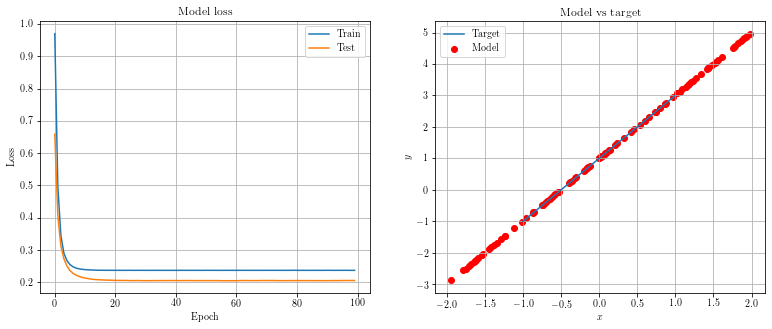

Final training data loss:  0.23708364820480346
Final validation data loss:  0.20558387160301209


In [14]:

# look into training history
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history.history['loss'][-1])
print("Final validation data loss: ", history.history['val_loss'][-1])

In questo caso si può osservare che c'è una discrepanza tra il MSE calcolato con i dati di training e quello calcolato con i dati di validazione, come è ragionevole che sia dato che c'è del rumore.

In [15]:
ntrain=5000
nvalid=500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 500 samples
Epoch 1/50
5000/5000 [==============================] - 1s 193us/sample - loss: 1.4233 - mse: 1.4233 - val_loss: 0.5136 - val_mse: 0.5136
Epoch 2/50
5000/5000 [==============================] - 0s 79us/sample - loss: 0.3707 - mse: 0.3707 - val_loss: 0.2686 - val_mse: 0.2686
Epoch 3/50
5000/5000 [==============================] - 0s 70us/sample - loss: 0.2606 - mse: 0.2606 - val_loss: 0.2405 - val_mse: 0.2405
Epoch 4/50
5000/5000 [==============================] - 0s 81us/sample - loss: 0.2471 - mse: 0.2471 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 5/50
5000/5000 [==============================] - 0s 79us/sample - loss: 0.2456 - mse: 0.2456 - val_loss: 0.2380 - val_mse: 0.2380
Epoch 6/50
5000/5000 [==============================] - 0s 67us/sample - loss: 0.2454 - mse: 0.2454 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 7/50
5000/5000 [==============================] - 0s 78us/sample - loss: 0.2454 - mse: 0.2454 - val_loss: 0.2381 - val_mse: 

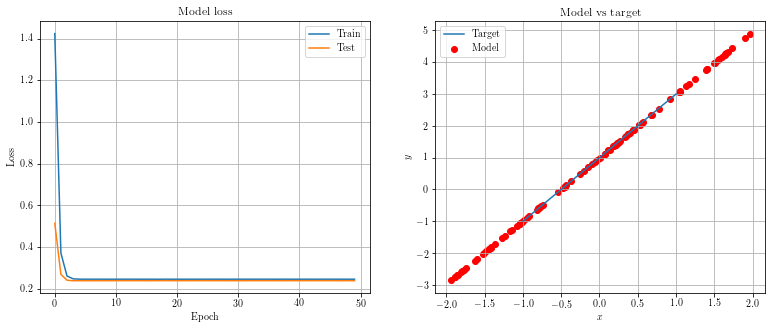

Final training data loss:  0.24530715985298157
Final validation data loss:  0.23813176202774047


In [16]:

# look into training history
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history.history['loss'][-1])
print("Final validation data loss: ", history.history['val_loss'][-1])

Questa discrepanza tende ad annullarsi se si considera un numero di dati maggiore (nei grafici sopra ho considerato $5000$ dati di training e $500$ di validazione). È ragionevole pensare che per un numero di dati sufficientemente grande il valore migliore per il MSE sia pari alla varianza dei dati estratti da una gaussiana, ossia a $\sigma^2=0.25$.

In effetti, se ora consideriamo $\sigma=2$ con $5000$ dati di training e $500$ di validazione:

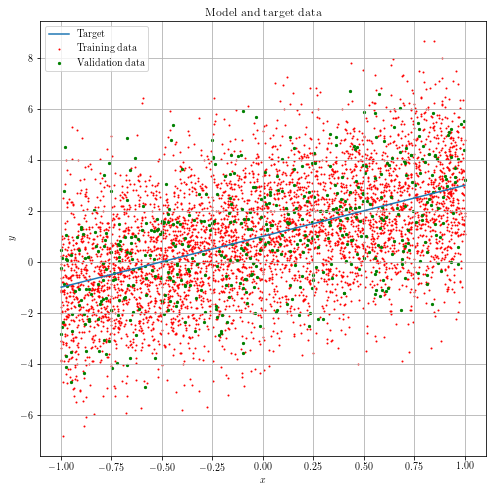

Train on 5000 samples, validate on 500 samples
Epoch 1/50
5000/5000 [==============================] - 1s 186us/sample - loss: 5.8141 - mse: 5.8141 - val_loss: 4.2300 - val_mse: 4.2300
Epoch 2/50
5000/5000 [==============================] - 0s 72us/sample - loss: 4.1376 - mse: 4.1376 - val_loss: 3.8445 - val_mse: 3.8445
Epoch 3/50
5000/5000 [==============================] - 0s 78us/sample - loss: 3.9527 - mse: 3.9527 - val_loss: 3.8091 - val_mse: 3.8091
Epoch 4/50
5000/5000 [==============================] - 0s 59us/sample - loss: 3.9285 - mse: 3.9285 - val_loss: 3.8084 - val_mse: 3.8084
Epoch 5/50
5000/5000 [==============================] - 0s 73us/sample - loss: 3.9253 - mse: 3.9253 - val_loss: 3.8097 - val_mse: 3.8097
Epoch 6/50
5000/5000 [==============================] - 0s 72us/sample - loss: 3.9253 - mse: 3.9253 - val_loss: 3.8096 - val_mse: 3.8096
Epoch 7/50
5000/5000 [==============================] - 0s 75us/sample - loss: 3.9240 - mse: 3.9240 - val_loss: 3.8116 - val_mse: 

In [17]:
ntrain=5000
nvalid=500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 2.0 # noise standard deviation
y_train =np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


# plot training and target dataset
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8,8))
plt.plot(x_valid, y_target, label="Target")
plt.title("Model and target data")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.scatter(x_train, y_train, color='r', s=1, label="Training data")
plt.scatter(x_valid, y_valid, color='g',s=5, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

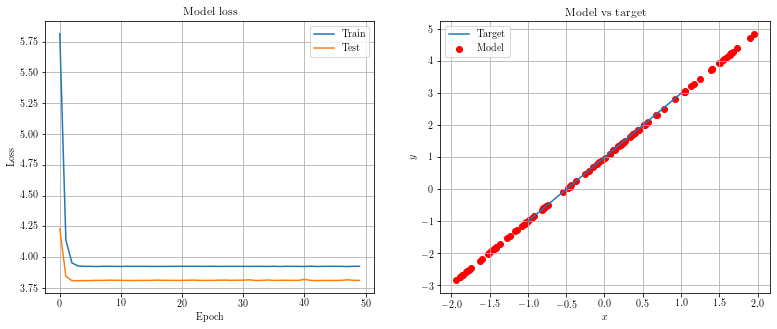

Final training data loss:  3.9252850761413574
Final validation data loss:  3.8110866165161132


In [18]:

# look into training history
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history.history['loss'][-1])
print("Final validation data loss: ", history.history['val_loss'][-1])

Si può osservare che il MSE in questo caso è vicino a $\sigma^2=4$. 